**Brief about the Project :** 
Software to detect network intrusions protects a computer network from unauthorized users, including perhaps insiders. 
This project aims to build a network intrusion detector, a predictive model capable of distinguishing between bad connections,
called intrusions or attacks, and good normal connections.

**Task:**
Model this problem as a BINARY classification problem. Use the following models to detect bad connections (intrusions). 
We will Compare the accuracy, recall, precision and F1-score of ALL the models.We will PRINT and PLOT the confusion matrix for each model.Show the ROC curve of each model. 
 
• Logistic Regression  • Nearest Neighbor  • Support Vector Machine  • Gaussian Naive Bayes  • Fully-Connected Neural Networks  • Convolutional Neural Networks (CNN)  
 
In all the models, encode good connections as “0” and bad connections as “1”. 

**CSC 215-01
   |Artificial Intelligence (Fall2018)
   |Mini-Project3: Network_Intrusion_Detection **


# **Importing the Dataset  & Data preprocessing **

**Importing File **

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn as sk
import pandas as pd
import tensorflow as tf
import numpy as np
import keras
from keras.optimizers import SGD
from keras import regularizers
from keras.layers import Dense, Dropout , Flatten
import sklearn as sk
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.layers import LeakyReLU
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [3]:
columns =[ 'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins',
          'logged_in','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files',
          'num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate',
          'srv_rerror_rate','same_srv_rate','diff_srv_rate','srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate',
          'dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate',
          'dst_host_rerror_rate','dst_host_srv_rerror_rate','outcome' ]

In [4]:
df = pd.read_csv("network_intrusion_data.csv",names = columns )

**Data Preprocessing**

In [5]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome'],
      dtype='object')

In [6]:
df.shape #shape of dataset

(494021, 42)

In [7]:
df.count() # count data per coulum

duration                       494021
protocol_type                  494021
service                        494021
flag                           494021
src_bytes                      494021
dst_bytes                      494021
land                           494021
wrong_fragment                 494021
urgent                         494021
hot                            494021
num_failed_logins              494021
logged_in                      494021
num_compromised                494021
root_shell                     494021
su_attempted                   494021
num_root                       494021
num_file_creations             494021
num_shells                     494021
num_access_files               494021
num_outbound_cmds              494021
is_host_login                  494021
is_guest_login                 494021
count                          494021
srv_count                      494021
serror_rate                    494021
srv_serror_rate                494021
rerror_rate 

In [8]:
df.dtypes # finding put the data types of the data

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [9]:
# find the unique values per columns 
for k, v in df.nunique().to_dict().items():
    print('{}={}'.format(k,v))

duration=2495
protocol_type=3
service=66
flag=11
src_bytes=3300
dst_bytes=10725
land=2
wrong_fragment=3
urgent=4
hot=22
num_failed_logins=6
logged_in=2
num_compromised=23
root_shell=2
su_attempted=3
num_root=20
num_file_creations=18
num_shells=3
num_access_files=7
num_outbound_cmds=1
is_host_login=1
is_guest_login=2
count=490
srv_count=470
serror_rate=92
srv_serror_rate=51
rerror_rate=77
srv_rerror_rate=51
same_srv_rate=99
diff_srv_rate=78
srv_diff_host_rate=64
dst_host_count=256
dst_host_srv_count=256
dst_host_same_srv_rate=101
dst_host_diff_srv_rate=101
dst_host_same_src_port_rate=101
dst_host_srv_diff_host_rate=65
dst_host_serror_rate=100
dst_host_srv_serror_rate=72
dst_host_rerror_rate=101
dst_host_srv_rerror_rate=101
outcome=23


**Drop rows with missing values(NaN) and notice change in count of rows**

In [10]:
#Drop rows with missing values(NaN) and notice change in count of rows 
df.dropna(inplace = True )
df.count()

duration                       494021
protocol_type                  494021
service                        494021
flag                           494021
src_bytes                      494021
dst_bytes                      494021
land                           494021
wrong_fragment                 494021
urgent                         494021
hot                            494021
num_failed_logins              494021
logged_in                      494021
num_compromised                494021
root_shell                     494021
su_attempted                   494021
num_root                       494021
num_file_creations             494021
num_shells                     494021
num_access_files               494021
num_outbound_cmds              494021
is_host_login                  494021
is_guest_login                 494021
count                          494021
srv_count                      494021
serror_rate                    494021
srv_serror_rate                494021
rerror_rate 

In [11]:
df['outcome'].unique()

array(['normal.', 'buffer_overflow.', 'loadmodule.', 'perl.', 'neptune.',
       'smurf.', 'guess_passwd.', 'pod.', 'teardrop.', 'portsweep.',
       'ipsweep.', 'land.', 'ftp_write.', 'back.', 'imap.', 'satan.',
       'phf.', 'nmap.', 'multihop.', 'warezmaster.', 'warezclient.',
       'spy.', 'rootkit.'], dtype=object)

In [12]:
# finding number of duplicate rows in dataset ( Values in the row are same as the values in the previous row )
df.duplicated().sum()

348435

In [13]:
#rows which have duplicate # top 5 records only 
df.loc[df.duplicated(keep = 'first'),:].head() # all except the first occurance are counted as duplicates

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outcome
2500,0,tcp,http,SF,307,60990,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
2864,0,tcp,http,SF,351,11485,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
2977,0,tcp,http,SF,506,2419,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
3003,0,tcp,http,SF,319,1374,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
3130,0,tcp,http,SF,234,1212,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.


**Drop duplicate rows**
We need to drop duplicate rows as that ,may bias the model when training

In [14]:
df.drop_duplicates(keep = 'first', inplace = True)

In [15]:
df.shape              ## The new shape of df after all duplicates rows have been removed .

(145586, 42)

Taking only 30% for testing 

In [16]:
df = df.sample(frac=0.3, replace=False)

In [17]:
df.shape

(43676, 42)

# Data Preprocessing & Feature Analysis and Seclection

Diving the dataframe into dataframes containing  catagorial and contiunuous data for better management and analysis 

In [18]:
dfcat = df[['protocol_type','service','flag','outcome']] ## data frame containing catagorical values

dfcon =df.drop(columns=['protocol_type','service','flag','outcome'])

In [19]:
dfcat.head(2) # observing the new dataset

,protocol_type,service,flag,outcome
470526,tcp,private,REJ,neptune.
26190,tcp,http,SF,normal.


In [20]:
dfcon.head(2) # observing the new dataset

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
470526,0,0,0,0,0,0,0,0,0,0,...,255,1,0.0,0.09,0.0,0.00,0.0,0.0,1.0,1.0
26190,0,230,16592,0,0,0,0,0,1,0,...,235,255,1.0,0.00,0.0,0.01,0.0,0.0,0.0,0.0


** Detect Outliers**

**Plotting and observng the Distribution**

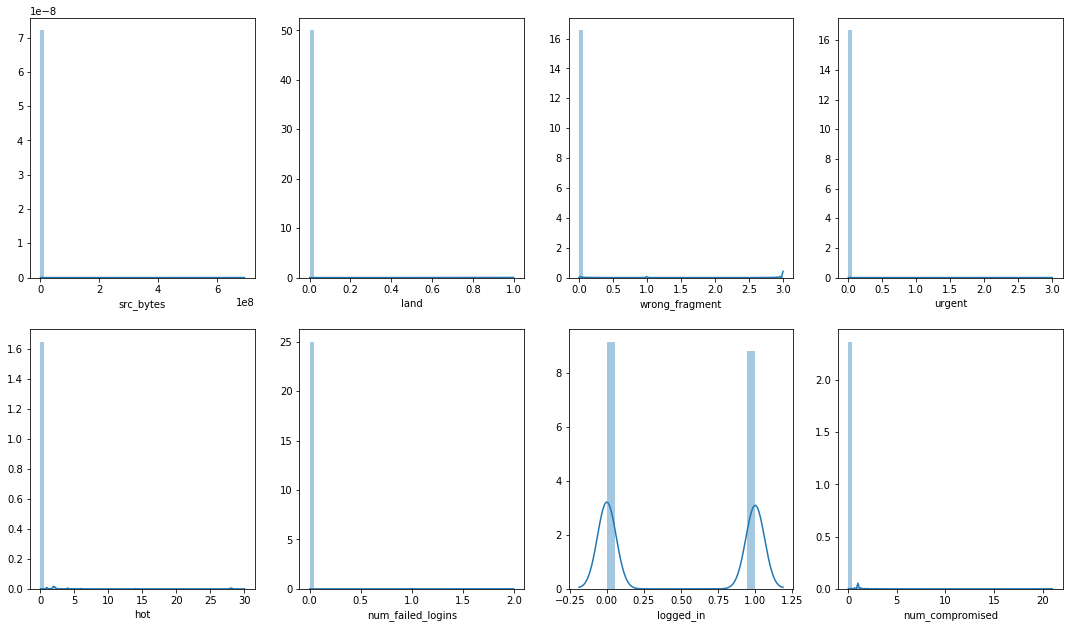

In [21]:
fig, axes = plt.subplots(2,4)
fig.set_size_inches(18.5, 10.5)
sns.distplot(df['src_bytes'], kde=True,ax=axes[0,0])
sns.distplot(df['land'].dropna(),kde=True,ax=axes[0,1])
sns.distplot(df['wrong_fragment'].dropna(),kde=True,ax=axes[0,2])
sns.distplot(df['urgent'].dropna(),kde=True,ax=axes[0,3])
sns.distplot(df['hot'].dropna(),kde=True,ax=axes[1,0])
sns.distplot(df['num_failed_logins'].dropna(),kde=True,ax=axes[1,1])
sns.distplot(df['logged_in'].dropna(),kde=True,ax=axes[1,2])
sns.distplot(df['num_compromised'].dropna(),kde=True,ax=axes[1,3])

C:\Users\Gurudev\Anaconda3\envs\Tensorflowexclusive\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Gurudev\Anaconda3\envs\Tensorflowexclusive\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


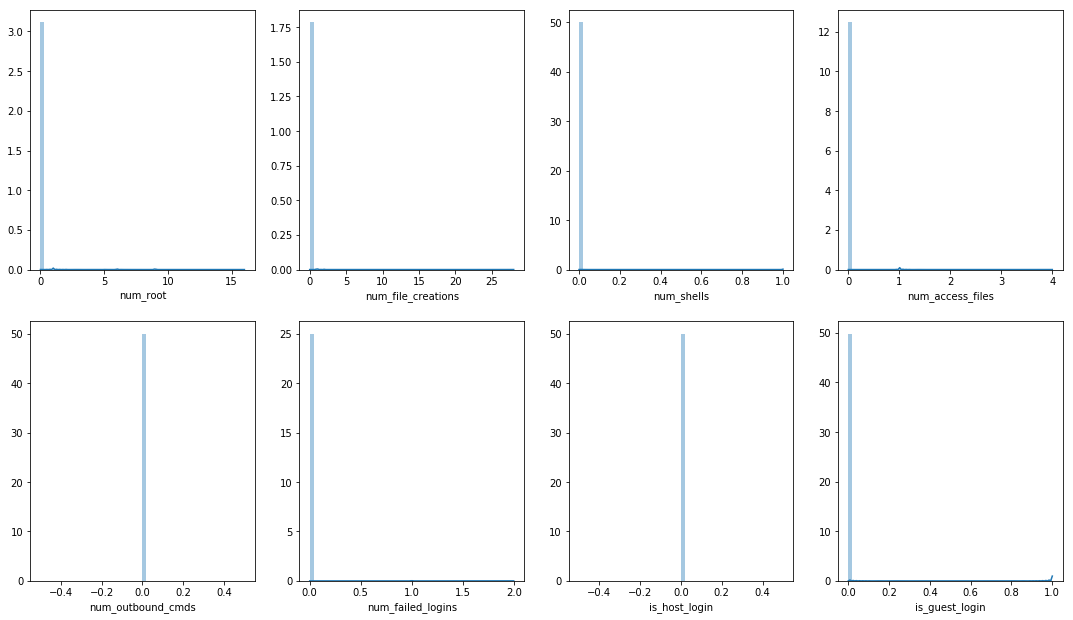

In [22]:
figs, axess = plt.subplots(2,4)
figs.set_size_inches(18.5, 10.5)
sns.distplot(df['num_root'].dropna(), kde=True,ax=axess[0,0])
sns.distplot(df['num_file_creations'].dropna(),kde=True,ax=axess[0,1])
sns.distplot(df['num_shells'].dropna(),kde=True,ax=axess[0,2])
sns.distplot(df['num_access_files'].dropna(),kde=True,ax=axess[0,3])
sns.distplot(df['num_outbound_cmds'].dropna(),kde=True,ax=axess[1,0])
sns.distplot(df['num_failed_logins'].dropna(),kde=True,ax=axess[1,1])
sns.distplot(df['is_host_login'].dropna(),kde=True,ax=axess[1,2])
sns.distplot(df['is_guest_login'].dropna(),kde=True,ax=axess[1,3])

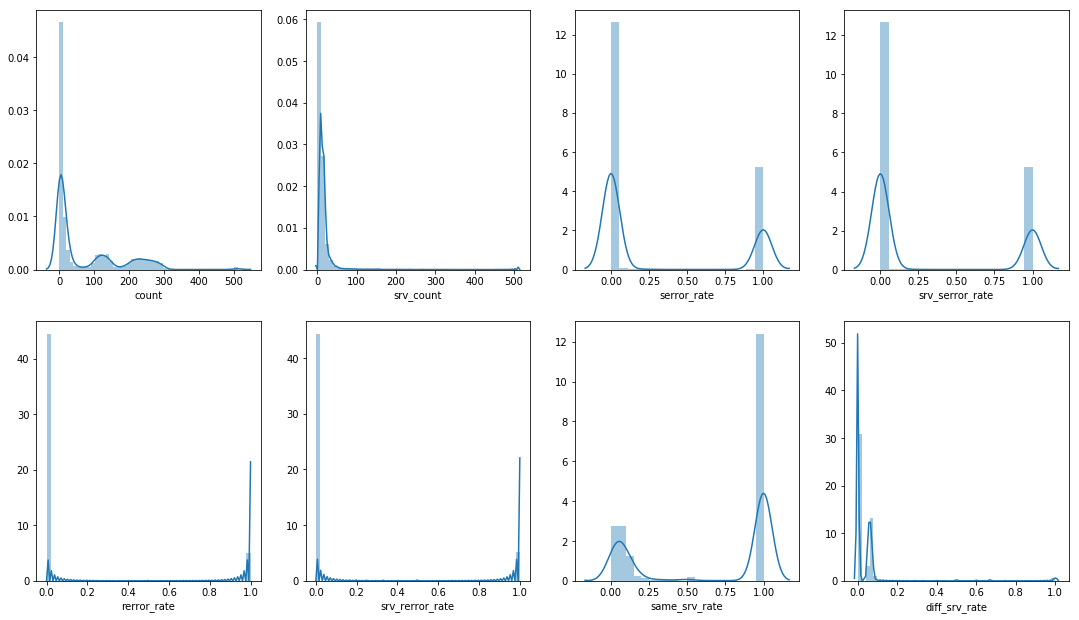

In [23]:
figs, axess = plt.subplots(2,4)
figs.set_size_inches(18.5, 10.5)
sns.distplot(df['count'].dropna(), kde=True,ax=axess[0,0])
sns.distplot(df['srv_count'].dropna(),kde=True,ax=axess[0,1])
sns.distplot(df['serror_rate'].dropna(),kde=True,ax=axess[0,2])
sns.distplot(df['srv_serror_rate'].dropna(),kde=True,ax=axess[0,3])
sns.distplot(df['rerror_rate'].dropna(),kde=True,ax=axess[1,0])
sns.distplot(df['srv_rerror_rate'].dropna(),kde=True,ax=axess[1,1])
sns.distplot(df['same_srv_rate'].dropna(),kde=True,ax=axess[1,2])
sns.distplot(df['diff_srv_rate'].dropna(),kde=True,ax=axess[1,3])

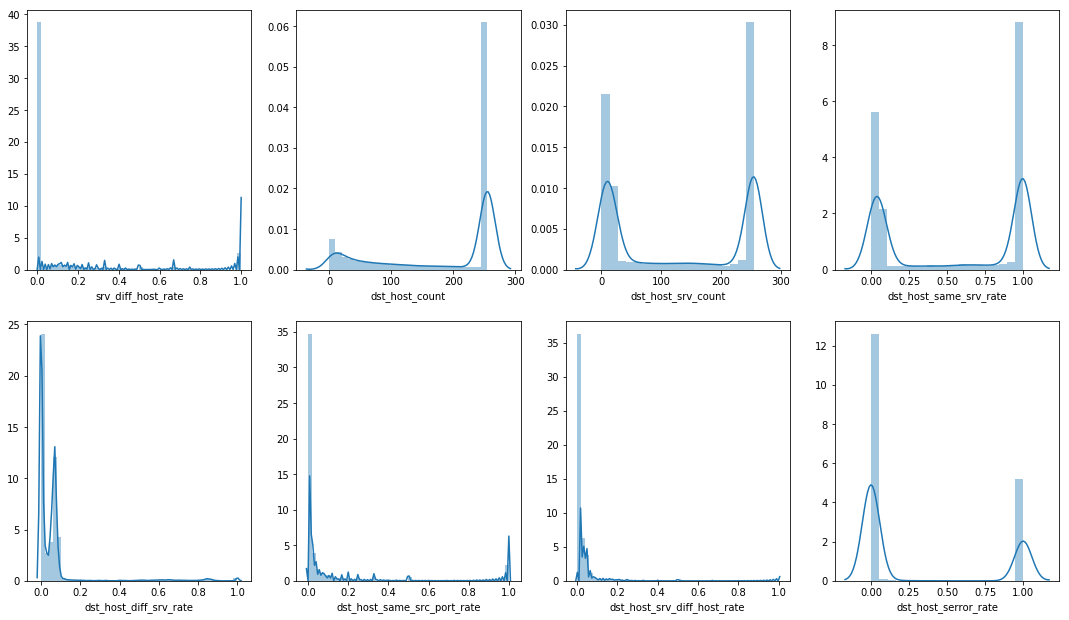

In [24]:
figs, axess = plt.subplots(2,4)
figs.set_size_inches(18.5, 10.5)
sns.distplot(df['srv_diff_host_rate'].dropna(), kde=True,ax=axess[0,0])
sns.distplot(df['dst_host_count'].dropna(),kde=True,ax=axess[0,1])
sns.distplot(df['dst_host_srv_count'].dropna(),kde=True,ax=axess[0,2])
sns.distplot(df['dst_host_same_srv_rate'].dropna(),kde=True,ax=axess[0,3])
sns.distplot(df['dst_host_diff_srv_rate'].dropna(),kde=True,ax=axess[1,0])
sns.distplot(df['dst_host_same_src_port_rate'].dropna(),kde=True,ax=axess[1,1])
sns.distplot(df['dst_host_srv_diff_host_rate'].dropna(),kde=True,ax=axess[1,2])
sns.distplot(df['dst_host_serror_rate'].dropna(),kde=True,ax=axess[1,3])

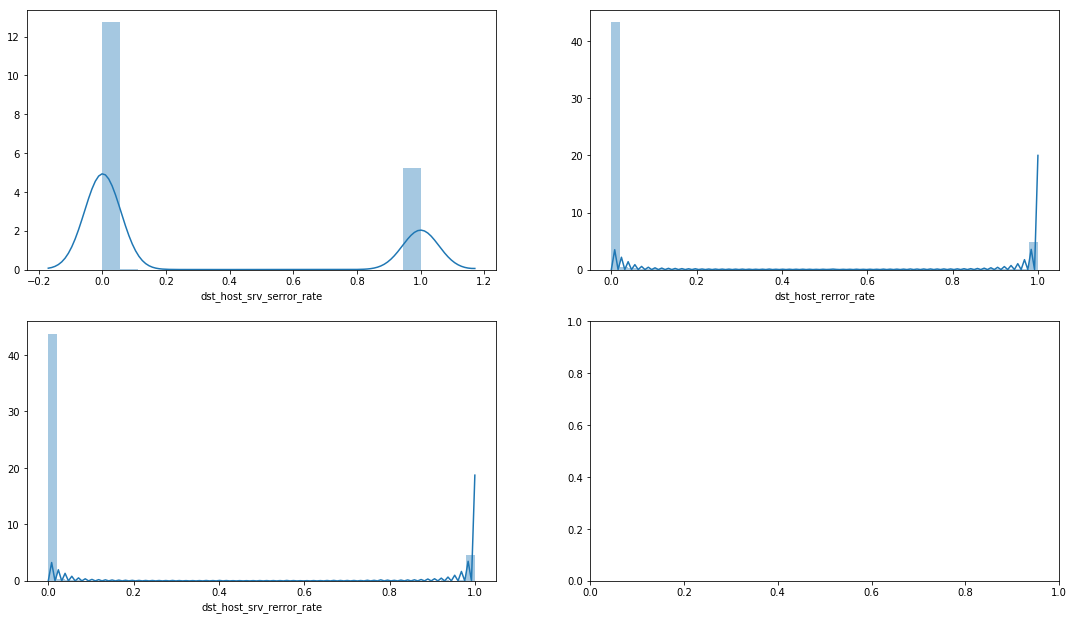

In [25]:
figs, axess = plt.subplots(2,2)
figs.set_size_inches(18.5, 10.5)
sns.distplot(df['dst_host_srv_serror_rate'].dropna(), kde=True,ax=axess[0,0])
sns.distplot(df['dst_host_rerror_rate'].dropna(),kde=True,ax=axess[0,1])
sns.distplot(df['dst_host_srv_rerror_rate'].dropna(),kde=True,ax=axess[1,0])

In [26]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'outcome'],
      dtype='object')

AxesSubplot(0.125,0.125;0.775x0.755)


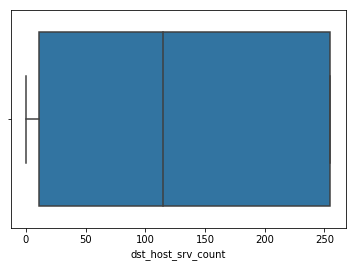

In [27]:
print(sns.boxplot(x=df['dst_host_srv_count']))

**###########################################################################################################################**

**Normalising all the continuous Data **

I have to normalise it first before removing the outliers because if not 
when i merge it with the catagorical data there will be mismatch in rows

In [28]:
df.shape

(43676, 42)

In [29]:
dfcon.shape

(43676, 38)

In [30]:
dfcat.shape

(43676, 4)

Data before Normalisation 

In [31]:
dfcon.head(3)

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
470526,0,0,0,0,0,0,0,0,0,0,...,255,1,0.0,0.09,0.00,0.00,0.0,0.0,1.0,1.0
26190,0,230,16592,0,0,0,0,0,1,0,...,235,255,1.0,0.00,0.00,0.01,0.0,0.0,0.0,0.0
81683,0,195,124,0,0,0,0,0,1,0,...,52,255,1.0,0.00,0.02,0.03,0.0,0.0,0.0,0.0


Normalising using Z score Scalar

In [32]:
#from scipy.stats import zscore  #method 1 
#dfcon.apply(zscore).head()

In [33]:
from sklearn.preprocessing import StandardScaler   #method 2
# Standardizing the features
x = dfcon.values #returns a numpy array
x_scaled= StandardScaler().fit_transform(x)
dfcon = pd.DataFrame(x_scaled,columns=dfcon.columns)


Data after Normalisation 

In [34]:
dfcon.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.113508,-0.005814,-0.065793,-0.00957,-0.082996,-0.004785,-0.068443,-0.021185,-0.981398,-0.047174,...,0.738627,-1.119028,-1.207426,0.183696,-0.384769,-0.314713,-0.646251,-0.643325,2.933857,2.962267
1,-0.113508,-0.005745,0.368685,-0.00957,-0.082996,-0.004785,-0.068443,-0.021185,1.018954,-0.047174,...,0.536235,1.093359,0.982366,-0.418565,-0.384769,-0.147463,-0.646251,-0.643325,-0.357625,-0.350407
2,-0.113508,-0.005755,-0.062546,-0.00957,-0.082996,-0.004785,-0.068443,-0.021185,1.018954,-0.047174,...,-1.315651,1.093359,0.982366,-0.418565,-0.302702,0.187035,-0.646251,-0.643325,-0.357625,-0.350407
3,-0.113508,-0.005814,-0.065793,-0.00957,-0.082996,-0.004785,-0.068443,-0.021185,-0.981398,-0.047174,...,0.738627,-1.119028,-1.207426,0.116779,-0.384769,-0.314713,-0.646251,-0.643325,2.933857,2.962267
4,-0.113508,-0.005752,-0.057675,-0.00957,-0.082996,-0.004785,-0.068443,-0.021185,1.018954,-0.047174,...,0.738627,1.093359,0.982366,-0.418565,-0.384769,-0.314713,-0.646251,-0.643325,-0.357625,-0.350407


**Doing PCA ( Principal Component Analysis)**

In [35]:
from sklearn.decomposition import PCA
# create the PCA instance
pca = PCA(0.95)
# fit on data
pca.fit(dfcon)
# access values and vectors
#print(pca.components_)
print("========================")
print("Principal Component Ratio : ",pca.explained_variance_ratio_)
# transform data
B = pca.transform(dfcon)
print("========================")
#print(B)
print( "No of Principal Component Involved to get 95% of the variance : ",pca.n_components_)

Principal Component Ratio :  [0.21847637 0.12597521 0.06023682 0.05367015 0.05171332 0.0395478
 0.03638512 0.03302108 0.02824453 0.02790397 0.0278179  0.02778699
 0.02761373 0.02723149 0.02693294 0.02633323 0.02488224 0.02300882
 0.02121365 0.01913483 0.0143739  0.01236509]
No of Principal Component Involved to get 95% of the variance :  22


===================================================================================================================

Concatinating dfcat and dfcon dataframes

In [36]:
dt = dfcat
dc = dfcon
dt.reset_index(drop=True, inplace=True)
dc.reset_index(drop=True, inplace=True)
df = pd.concat([dc, dt], axis=1)

In [37]:
dfcon.shape

(43676, 38)

In [38]:
dfcat.shape

(43676, 4)

In [39]:
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,outcome
0,-0.113508,-0.005814,-0.065793,-0.00957,-0.082996,-0.004785,-0.068443,-0.021185,-0.981398,-0.047174,...,-0.384769,-0.314713,-0.646251,-0.643325,2.933857,2.962267,tcp,private,REJ,neptune.
1,-0.113508,-0.005745,0.368685,-0.00957,-0.082996,-0.004785,-0.068443,-0.021185,1.018954,-0.047174,...,-0.384769,-0.147463,-0.646251,-0.643325,-0.357625,-0.350407,tcp,http,SF,normal.
2,-0.113508,-0.005755,-0.062546,-0.00957,-0.082996,-0.004785,-0.068443,-0.021185,1.018954,-0.047174,...,-0.302702,0.187035,-0.646251,-0.643325,-0.357625,-0.350407,tcp,http,SF,normal.
3,-0.113508,-0.005814,-0.065793,-0.00957,-0.082996,-0.004785,-0.068443,-0.021185,-0.981398,-0.047174,...,-0.384769,-0.314713,-0.646251,-0.643325,2.933857,2.962267,tcp,private,REJ,neptune.
4,-0.113508,-0.005752,-0.057675,-0.00957,-0.082996,-0.004785,-0.068443,-0.021185,1.018954,-0.047174,...,-0.384769,-0.314713,-0.646251,-0.643325,-0.357625,-0.350407,tcp,http,SF,normal.


In [40]:
df['outcome'].unique()

array(['neptune.', 'normal.', 'back.', 'teardrop.', 'satan.',
       'portsweep.', 'warezclient.', 'ipsweep.', 'smurf.', 'nmap.',
       'pod.', 'imap.', 'guess_passwd.', 'buffer_overflow.',
       'loadmodule.', 'land.', 'rootkit.', 'ftp_write.', 'warezmaster.',
       'phf.', 'multihop.'], dtype=object)

In [41]:
df.dropna(inplace = True)

**Removing Outliers from the dataset**

In [42]:
# Remove all rows where the specified column is +/- sd standard deviations
def remove_outliers(df, name, sd):
    drop_rows = df.index[(np.abs(df[name] - df[name].mean()) >= (sd * df[name].std()))]
    df.drop(drop_rows, axis=0, inplace=True)


In [43]:
remove_outliers(df,'dst_host_srv_rerror_rate' ,.5)
#remove_outliers(df,'serror_rate' ,.5)

**Dividing the Dataframe to Features and Label Dataframe**

In [44]:
dff = df.drop(columns ='outcome')
dfl= df[['outcome']]

**One Hot Encoding the Features**

In [45]:
dff = pd.get_dummies(data = dff ,columns=['protocol_type','service','flag'])

In [46]:
dff.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
1,-0.113508,-0.005745,0.368685,-0.00957,-0.082996,-0.004785,-0.068443,-0.021185,1.018954,-0.047174,...,0,0,0,0,0,0,0,0,1,0
2,-0.113508,-0.005755,-0.062546,-0.00957,-0.082996,-0.004785,-0.068443,-0.021185,1.018954,-0.047174,...,0,0,0,0,0,0,0,0,1,0
4,-0.113508,-0.005752,-0.057675,-0.00957,-0.082996,-0.004785,-0.068443,-0.021185,1.018954,-0.047174,...,0,0,0,0,0,0,0,0,1,0
5,-0.113508,-0.005725,0.019966,-0.00957,-0.082996,-0.004785,-0.068443,-0.021185,1.018954,-0.047174,...,0,0,0,0,0,0,0,0,1,0
6,-0.113508,-0.004996,-0.057125,-0.00957,-0.082996,-0.004785,-0.068443,-0.021185,1.018954,-0.047174,...,0,0,0,0,0,0,0,0,1,0


In [47]:
dff.dropna(inplace = True)

**PCA :with one hot encoded catagorical values added we see the components values are almost the same when compared to previous result**

In [48]:
from sklearn.decomposition import PCA
# create the PCA instance
pc = PCA(0.95)
# fit on data
pc.fit(dff)
# access values and vectors
#print(pca.components_)
print("========================")
print("Principal Component Ratio : ",pc.explained_variance_ratio_)
# transform data
#B = pc.transform(dfcon)
print("========================")
#print(B)
#print( "No of Principal Component Involved to get 95% of the variance : ",pc.n_components_)

Principal Component Ratio :  [0.27895651 0.07294058 0.0642708  0.06226343 0.04474499 0.04304718
 0.03687284 0.03437958 0.03422916 0.03418929 0.03389543 0.032662
 0.03155274 0.03118435 0.02591381 0.0235114  0.0223144  0.01441357
 0.01421117 0.01333809 0.0092186 ]


In [49]:
#label of the dataset 
dfl.head()

,outcome
1,normal.
2,normal.
4,normal.
5,normal.
6,normal.


In [50]:
dfl['outcome'].unique() #Noticing the unique values in the column

array(['normal.', 'neptune.', 'back.', 'teardrop.', 'satan.',
       'warezclient.', 'ipsweep.', 'smurf.', 'nmap.', 'pod.',
       'portsweep.', 'imap.', 'buffer_overflow.', 'loadmodule.', 'land.',
       'rootkit.', 'ftp_write.', 'warezmaster.', 'phf.', 'multihop.'],
      dtype=object)

In [51]:
dft = dfl.copy()

**Changing All the Noonection to 0 except "Normal" Connection which is marked as 1,** 
**As Needed By Binary classification models **

In [52]:
dft['outcomes'] = [0 if x == 'normal.' else 1 for x in dft['outcome']]

In [53]:
dft['outcome'].unique()

array(['normal.', 'neptune.', 'back.', 'teardrop.', 'satan.',
       'warezclient.', 'ipsweep.', 'smurf.', 'nmap.', 'pod.',
       'portsweep.', 'imap.', 'buffer_overflow.', 'loadmodule.', 'land.',
       'rootkit.', 'ftp_write.', 'warezmaster.', 'phf.', 'multihop.'],
      dtype=object)

In [54]:
dft['outcomes'].unique()

array([0, 1], dtype=int64)

In [55]:
dft =dft.drop(columns=['outcome'])
dft['outcome'] = dft[['outcomes']]
dft =dft.drop(columns=['outcomes'])

In [56]:
dft['outcome'].unique()

array([0, 1], dtype=int64)

**Feature Importance and Feature Selection -With XGBoost in Python**

[0.01320132 0.17821783 0.08910891 0.         0.02640264 0.
 0.07095709 0.         0.00825083 0.00165017 0.         0.
 0.         0.00660066 0.         0.         0.         0.
 0.         0.05445544 0.00990099 0.00495049 0.00660066 0.
 0.01485149 0.         0.         0.00660066 0.06105611 0.06105611
 0.01815182 0.0280528  0.08250825 0.05280528 0.04125413 0.01155115
 0.02475248 0.         0.01815182 0.00495049 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.01980198 0.         0.         0.         0.
 0.01815182 0.         0.         0.02310231 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.00165017 0.         0.
 0.         0.0280528  0.         0.         0.         0.01320132
 0.         0.         0.         0.         0.         0.
 0.         0.         0.       

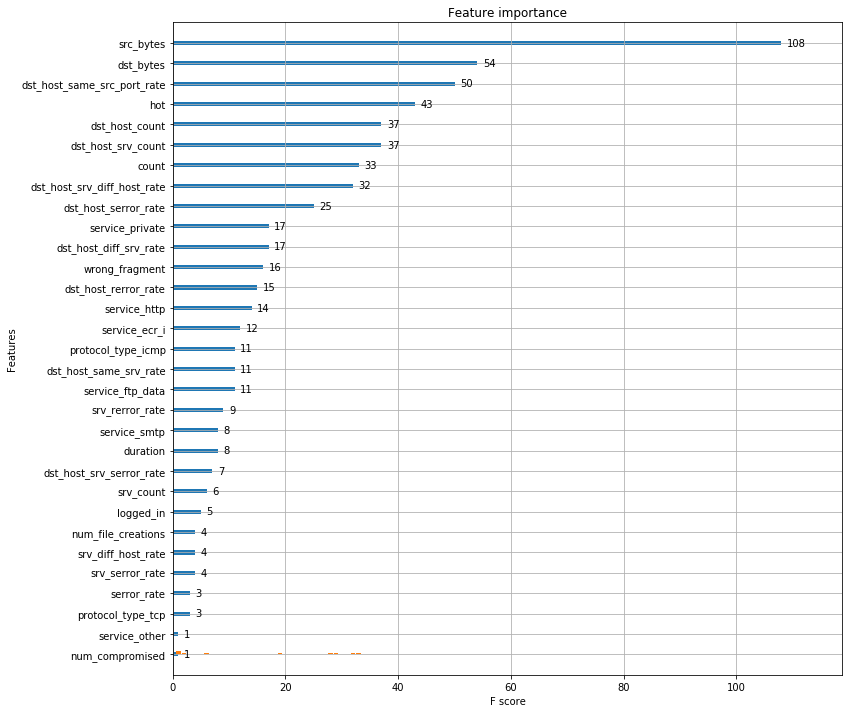

In [57]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(dff, dft.values.ravel())

# plot feature importance
ax = plot_importance(model)

# feature importance
print(model.feature_importances_)
fig = ax.figure
fig.set_size_inches(12, 12)

# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

# Modeling as a BINARY classification problem.
# Using the models to detect good (0) / bad (1) connections (intrusions).

**Splitting the dataset into Training and Testing set**

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dff, dft, test_size=0.33, random_state=42, shuffle = True,stratify =dft)

In [59]:
X_train.shape

(26061, 114)

In [60]:
 y_train.shape

(26061, 1)

In [61]:
X_test.shape

(12837, 114)

In [62]:
 y_test.shape

(12837, 1)

In [63]:
# copied to be used in PCA
Xtrain = X_train.copy()
Xtest = X_test.copy()
ytrain = y_train.copy()
ytest = y_test.copy()

**MODELS**

**1. Logistic Regression**

In [64]:
#Logistic Regression 
from sklearn import linear_model 
logmod = linear_model.LogisticRegression(C=1e5)
logmod.fit(X_train, y_train.values.ravel())
y_predval = logmod.predict(X_test)

Performance Metrics of Logistric Regression

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      8194
          1       0.99      0.99      0.99      4643

avg / total       1.00      1.00      1.00     12837

Accuracy :  0.9961829087793098
------------------------------------------------------------------------------------------------------------------------

confusion Matrix

[[8169   25]
 [  24 4619]]


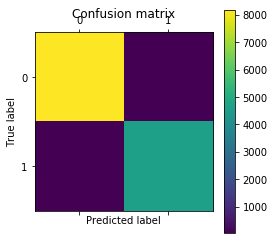

The diagonal elements in confusion matrix represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
------------------------------------------------------------------------------------------------------------------------

 AUC: 0.996

         ROC CURVE   


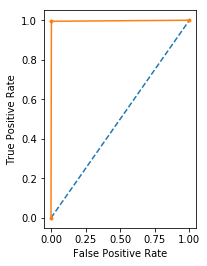

In [65]:
print(metrics.classification_report(y_test,y_predval))
print("Accuracy : ",accuracy_score(y_test, y_predval))
#plt.subplot(1, 2, 1)
print("------------------------------------------------------------------------------------------------------------------------")
# Compute confusion matrix
cm = confusion_matrix(y_test, y_predval)
print("\nconfusion Matrix\n")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
plt.subplot(1, 2, 2)
# calculate AUC
auc = roc_auc_score(y_test, y_predval)
print("The diagonal elements in confusion matrix represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.")
print("------------------------------------------------------------------------------------------------------------------------")
print('\n AUC: %.3f' % auc)
# calculate roc curve
print("\n         ROC CURVE   ")
fpr, tpr, thresholds = roc_curve(y_test, y_predval)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**2. Nearest Neighbor**

In [66]:
#KNN to show true ratings of 5 businesses and the predicted ratings from model
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train.values.ravel())
y_predval= neigh.predict(X_test)

Performance Metrics of Nearest Neighbor

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      8194
          1       1.00      1.00      1.00      4643

avg / total       1.00      1.00      1.00     12837

Accuracy :  0.997351406091766
------------------------------------------------------------------------------------------------------------------------

confusion Matrix

[[8180   14]
 [  20 4623]]


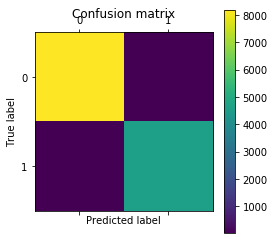

The diagonal elements in confusion matrix represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
------------------------------------------------------------------------------------------------------------------------

 AUC: 0.997

         ROC CURVE   


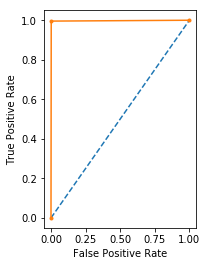

In [67]:
print(metrics.classification_report(y_test,y_predval))
print("Accuracy : ",accuracy_score(y_test, y_predval))
#plt.subplot(1, 2, 1)
print("------------------------------------------------------------------------------------------------------------------------")
# Compute confusion matrix
cm = confusion_matrix(y_test, y_predval)
print("\nconfusion Matrix\n")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
plt.subplot(1, 2, 2)
# calculate AUC
auc = roc_auc_score(y_test, y_predval)
print("The diagonal elements in confusion matrix represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.")
print("------------------------------------------------------------------------------------------------------------------------")
print('\n AUC: %.3f' % auc)
# calculate roc curve
print("\n         ROC CURVE   ")
fpr, tpr, thresholds = roc_curve(y_test, y_predval)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**3. Support Vector Machine **

In [68]:
#SVM to show true ratings of 5 businesses and the predicted ratings from model
from sklearn import svm
#logmodel=  svm.SVC(kernel='linear')
logmodel=  svm.SVC(C=1, kernel = 'linear', gamma=1, verbose= False, probability=False, random_state=42)
logmodel.fit(X_train, y_train.values.ravel())
y_predval = logmodel.predict(X_test)

Performance Metrics of SVM

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      8194
          1       0.99      1.00      0.99      4643

avg / total       1.00      1.00      1.00     12837

Accuracy :  0.9961829087793098
------------------------------------------------------------------------------------------------------------------------

confusion Matrix

[[8168   26]
 [  23 4620]]


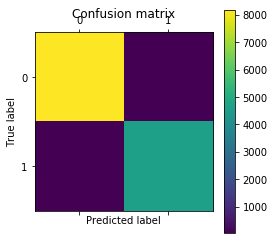

The diagonal elements in confusion matrix represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
------------------------------------------------------------------------------------------------------------------------

 AUC: 0.996

         ROC CURVE   


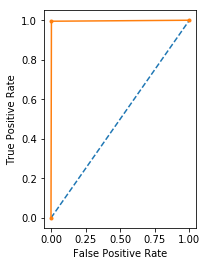

In [69]:
print(metrics.classification_report(y_test,y_predval))
print("Accuracy : ",accuracy_score(y_test, y_predval))
#plt.subplot(1, 2, 1)
print("------------------------------------------------------------------------------------------------------------------------")
# Compute confusion matrix
cm = confusion_matrix(y_test, y_predval)
print("\nconfusion Matrix\n")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
plt.subplot(1, 2, 2)
# calculate AUC
auc = roc_auc_score(y_test, y_predval)
print("The diagonal elements in confusion matrix represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.")
print("------------------------------------------------------------------------------------------------------------------------")
print('\n AUC: %.3f' % auc)
# calculate roc curve
print("\n         ROC CURVE   ")
fpr, tpr, thresholds = roc_curve(y_test, y_predval)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**4 . Gaussian Naive Bayes**

In [70]:
#Multinomial Naive Bayes to show true ratings of 5 businesses and the predicted ratings from model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train.values.ravel())
y_predval = nb.predict(X_test)

Performance Metrics of Gaussian Naive Bayes

             precision    recall  f1-score   support

          0       0.97      1.00      0.98      8194
          1       0.99      0.95      0.97      4643

avg / total       0.98      0.98      0.98     12837

Accuracy :  0.9801355456882449
------------------------------------------------------------------------------------------------------------------------

confusion Matrix

[[8158   36]
 [ 219 4424]]


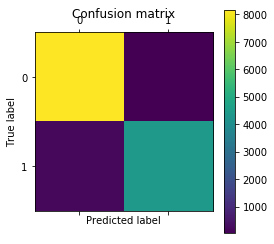

The diagonal elements in confusion matrix represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
------------------------------------------------------------------------------------------------------------------------

 AUC: 0.974

         ROC CURVE   


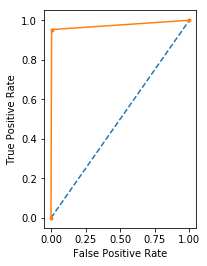

In [71]:
print(metrics.classification_report(y_test,y_predval))
print("Accuracy : ",accuracy_score(y_test, y_predval))
#plt.subplot(1, 2, 1)
print("------------------------------------------------------------------------------------------------------------------------")
# Compute confusion matrix
cm = confusion_matrix(y_test, y_predval)
print("\nconfusion Matrix\n")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
plt.subplot(1, 2, 2)
# calculate AUC
auc = roc_auc_score(y_test, y_predval)
print("The diagonal elements in confusion matrix represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.")
print("------------------------------------------------------------------------------------------------------------------------")
print('\n AUC: %.3f' % auc)
# calculate roc curve
print("\n         ROC CURVE   ")
fpr, tpr, thresholds = roc_curve(y_test, y_predval)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

**5. Fully-Connected Neural Networks**

Model Version 1

In [72]:
from keras.utils import to_categorical
y_binary_test = to_categorical(y_test)
y_binary_train = to_categorical(y_train)

In [73]:
X_train.shape[1],

(114,)

In [74]:
import keras as kp
# Define ModelCheckpoint outside the loop
checkpoint3 = ModelCheckpoint(filepath="best_weights5.hdf5", verbose=0, save_best_only=True,mode='max') # save best model
for i in range(3):
########################################################################################################################
    model3 = Sequential()
    model3.add(Dense(20, input_dim = X_train.shape[1], activation='relu'))
    model3.add(Dense(15,activation='relu' ))
    model3.add(Dense(100))
    model3.add(LeakyReLU(alpha=0.1))
    model3.add(Dense(100))
    model3.add(LeakyReLU(alpha=0.1)) ##Leaky Relu
    model3.add(Dense(20,activation= 'relu' ))
    # Regularisation Through Drop Out 
    model3.add(Dense(15,activation='tanh'))
    model3.add(Dense(15, 
                kernel_regularizer=regularizers.l1(0.01),
                activity_regularizer=regularizers.l2(0.01), activation='relu'))
    model3.add(Dropout(0.25))
    model3.add(Dense(15,activation= 'relu'))
    model3.add(Dense(y_binary_test.shape[1],activation='sigmoid'))
    rms = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model3.compile(loss='categorical_crossentropy', optimizer= rms ,metrics=[kp.metrics.mae, kp.metrics.categorical_accuracy])
    monitor3 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=2, mode='auto')  
# The test set is checked during training to monitor progress for early stopping but is never used for gradient descent (model training)
#checkpoint3 = ModelCheckpoint(filepath="best_weights5.hdf5", verbose=0, save_best_only=True,mode='max') # save best model
    callbacks_list = [monitor3,checkpoint3]
    model3.fit(X_train, y_binary_train, validation_data=(X_test,y_binary_test), callbacks=callbacks_list, verbose=2,batch_size=32, epochs=200)
##########################################################################################################################
print('Training finished...Loading the best model')  
print()
model3.load_weights("best_weights5.hdf5") # load weights from best model

# Measure accuracy
pred3 = model3.predict(X_test)
pred3 = np.argmax(pred3,axis=1)
#y_true = np.argmax(y_test,axis=1)
score = sk.metrics.accuracy_score(y_test, pred3)
print("Final accuracy: {}".format(score))

Train on 26061 samples, validate on 12837 samples
Epoch 1/200
 - 2s - loss: 0.3782 - mean_absolute_error: 0.2224 - categorical_accuracy: 0.9502 - val_loss: 0.0658 - val_mean_absolute_error: 0.1022 - val_categorical_accuracy: 0.9947
Epoch 2/200
 - 2s - loss: 0.0524 - mean_absolute_error: 0.1649 - categorical_accuracy: 0.9954 - val_loss: 0.0375 - val_mean_absolute_error: 0.1598 - val_categorical_accuracy: 0.9959
Epoch 3/200
 - 2s - loss: 0.0399 - mean_absolute_error: 0.1809 - categorical_accuracy: 0.9955 - val_loss: 0.0376 - val_mean_absolute_error: 0.1371 - val_categorical_accuracy: 0.9952
Epoch 4/200
 - 2s - loss: 0.0368 - mean_absolute_error: 0.1765 - categorical_accuracy: 0.9955 - val_loss: 0.0293 - val_mean_absolute_error: 0.1565 - val_categorical_accuracy: 0.9967
Epoch 5/200
 - 1s - loss: 0.0370 - mean_absolute_error: 0.1657 - categorical_accuracy: 0.9955 - val_loss: 0.0293 - val_mean_absolute_error: 0.1452 - val_categorical_accuracy: 0.9963
Epoch 6/200
 - 2s - loss: 0.0320 - mean_

Epoch 16/200
 - 1s - loss: 0.0306 - mean_absolute_error: 0.2211 - categorical_accuracy: 0.9945 - val_loss: 0.0373 - val_mean_absolute_error: 0.2380 - val_categorical_accuracy: 0.9933
Epoch 17/200
 - 1s - loss: 0.0285 - mean_absolute_error: 0.2527 - categorical_accuracy: 0.9951 - val_loss: 0.0236 - val_mean_absolute_error: 0.2400 - val_categorical_accuracy: 0.9971
Epoch 18/200
 - 2s - loss: 0.0278 - mean_absolute_error: 0.2603 - categorical_accuracy: 0.9951 - val_loss: 0.0237 - val_mean_absolute_error: 0.2532 - val_categorical_accuracy: 0.9970
Epoch 19/200
 - 2s - loss: 0.0282 - mean_absolute_error: 0.2635 - categorical_accuracy: 0.9946 - val_loss: 0.0253 - val_mean_absolute_error: 0.2622 - val_categorical_accuracy: 0.9974
Epoch 20/200
 - 2s - loss: 0.0258 - mean_absolute_error: 0.2640 - categorical_accuracy: 0.9957 - val_loss: 0.0255 - val_mean_absolute_error: 0.2543 - val_categorical_accuracy: 0.9975
Epoch 21/200
 - 2s - loss: 0.0292 - mean_absolute_error: 0.2680 - categorical_accurac

Epoch 29/200
 - 2s - loss: 0.0345 - mean_absolute_error: 0.2969 - categorical_accuracy: 0.9931 - val_loss: 0.0262 - val_mean_absolute_error: 0.2764 - val_categorical_accuracy: 0.9966
Epoch 30/200
 - 2s - loss: 0.0279 - mean_absolute_error: 0.2918 - categorical_accuracy: 0.9953 - val_loss: 0.0253 - val_mean_absolute_error: 0.2627 - val_categorical_accuracy: 0.9972
Epoch 00030: early stopping
Training finished...Loading the best model

Final accuracy: 0.9893277245462335


Performance Metrics of Fully-Connected Neural Networks   Model 1 

             precision    recall  f1-score   support

          0       1.00      0.99      0.99      8194
          1       0.98      0.99      0.99      4643

avg / total       0.99      0.99      0.99     12837

Accuracy :  0.9893277245462335
------------------------------------------------------------------------------------------------------------------------

confusion Matrix

[[8085  109]
 [  28 4615]]


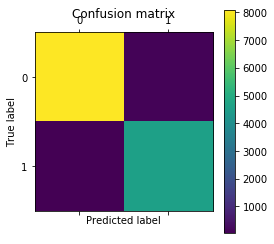

The diagonal elements in confusion matrix represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
------------------------------------------------------------------------------------------------------------------------

 AUC: 0.990

         ROC CURVE   


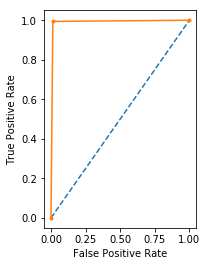

In [75]:
print(metrics.classification_report(y_test,pred3))
print("Accuracy : ",accuracy_score(y_test, pred3))
#plt.subplot(1, 2, 1)
print("------------------------------------------------------------------------------------------------------------------------")
# Compute confusion matrix
cm = confusion_matrix(y_test, pred3)
print("\nconfusion Matrix\n")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
plt.subplot(1, 2, 2)
# calculate AUC
auc = roc_auc_score(y_test,pred3)
print("The diagonal elements in confusion matrix represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.")
print("------------------------------------------------------------------------------------------------------------------------")
print('\n AUC: %.3f' % auc)
# calculate roc curve
print("\n         ROC CURVE   ")
fpr, tpr, thresholds = roc_curve(y_test, pred3)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [76]:
 model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 20)                2300      
_________________________________________________________________
dense_20 (Dense)             (None, 15)                315       
_________________________________________________________________
dense_21 (Dense)             (None, 100)               1600      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 100)               10100     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 100)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 20)                2020      
__________

Model Version 2

In [77]:
checkpoint = ModelCheckpoint(filepath="best_weights3.hdf5", verbose=0, save_best_only=True,mode='max') # save best model
for i in range(5):
########################################################################################################################
    model = Sequential()
    model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(5,activation='relu'))
    model.add(Dense(y_binary_test.shape[1],activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=[ kp.metrics.categorical_accuracy])
    monitor2 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=2, mode='auto')  
    # patience: number of epochs with no improvement after which training will be stopped
    # The test set is checked during training to monitor progress for early stopping but is never used for gradient descent (model training)
    callbacks_list = [monitor2,checkpoint]
    model.fit(X_train, y_binary_train, validation_data=(X_test,y_binary_test), callbacks=callbacks_list, verbose=2,batch_size=32, epochs=100)
##########################################################################################################################

print('Training finished...Loading the best model')  
print()
model.load_weights("best_weights3.hdf5") # load weights from best model

# Measure accuracy
pred2 = model.predict(X_test)
pred2 = np.argmax(pred2,axis=1)
y_true = np.argmax(y_test,axis=1)
score = sk.metrics.accuracy_score(y_test, pred2)
print("Final accuracy: {}".format(score))

Train on 26061 samples, validate on 12837 samples
Epoch 1/100
 - 2s - loss: 0.0664 - categorical_accuracy: 0.9874 - val_loss: 0.0206 - val_categorical_accuracy: 0.9947
Epoch 2/100
 - 1s - loss: 0.0169 - categorical_accuracy: 0.9957 - val_loss: 0.0154 - val_categorical_accuracy: 0.9963
Epoch 3/100
 - 1s - loss: 0.0134 - categorical_accuracy: 0.9964 - val_loss: 0.0136 - val_categorical_accuracy: 0.9963
Epoch 4/100
 - 1s - loss: 0.0114 - categorical_accuracy: 0.9971 - val_loss: 0.0126 - val_categorical_accuracy: 0.9969
Epoch 5/100
 - 1s - loss: 0.0104 - categorical_accuracy: 0.9972 - val_loss: 0.0119 - val_categorical_accuracy: 0.9968
Epoch 6/100
 - 1s - loss: 0.0091 - categorical_accuracy: 0.9976 - val_loss: 0.0117 - val_categorical_accuracy: 0.9974
Epoch 7/100
 - 1s - loss: 0.0086 - categorical_accuracy: 0.9975 - val_loss: 0.0110 - val_categorical_accuracy: 0.9970
Epoch 8/100
 - 1s - loss: 0.0082 - categorical_accuracy: 0.9975 - val_loss: 0.0108 - val_categorical_accuracy: 0.9970
Epoch 

Epoch 41/100
 - 1s - loss: 0.0034 - categorical_accuracy: 0.9990 - val_loss: 0.0104 - val_categorical_accuracy: 0.9975
Epoch 42/100
 - 1s - loss: 0.0032 - categorical_accuracy: 0.9990 - val_loss: 0.0107 - val_categorical_accuracy: 0.9972
Epoch 43/100
 - 1s - loss: 0.0034 - categorical_accuracy: 0.9990 - val_loss: 0.0097 - val_categorical_accuracy: 0.9977
Epoch 44/100
 - 1s - loss: 0.0030 - categorical_accuracy: 0.9990 - val_loss: 0.0112 - val_categorical_accuracy: 0.9974
Epoch 45/100
 - 1s - loss: 0.0035 - categorical_accuracy: 0.9991 - val_loss: 0.0096 - val_categorical_accuracy: 0.9975
Epoch 46/100
 - 1s - loss: 0.0033 - categorical_accuracy: 0.9990 - val_loss: 0.0125 - val_categorical_accuracy: 0.9970
Epoch 47/100
 - 1s - loss: 0.0034 - categorical_accuracy: 0.9990 - val_loss: 0.0108 - val_categorical_accuracy: 0.9974
Epoch 48/100
 - 1s - loss: 0.0032 - categorical_accuracy: 0.9990 - val_loss: 0.0101 - val_categorical_accuracy: 0.9974
Epoch 49/100
 - 1s - loss: 0.0034 - categorical_

Epoch 13/100
 - 1s - loss: 0.0061 - categorical_accuracy: 0.9985 - val_loss: 0.0120 - val_categorical_accuracy: 0.9972
Epoch 14/100
 - 1s - loss: 0.0057 - categorical_accuracy: 0.9984 - val_loss: 0.0122 - val_categorical_accuracy: 0.9974
Epoch 15/100
 - 1s - loss: 0.0062 - categorical_accuracy: 0.9985 - val_loss: 0.0109 - val_categorical_accuracy: 0.9975
Epoch 16/100
 - 1s - loss: 0.0046 - categorical_accuracy: 0.9986 - val_loss: 0.0108 - val_categorical_accuracy: 0.9976
Epoch 17/100
 - 1s - loss: 0.0045 - categorical_accuracy: 0.9986 - val_loss: 0.0110 - val_categorical_accuracy: 0.9974
Epoch 18/100
 - 1s - loss: 0.0049 - categorical_accuracy: 0.9985 - val_loss: 0.0098 - val_categorical_accuracy: 0.9978
Epoch 19/100
 - 1s - loss: 0.0056 - categorical_accuracy: 0.9986 - val_loss: 0.0104 - val_categorical_accuracy: 0.9977
Epoch 20/100
 - 1s - loss: 0.0042 - categorical_accuracy: 0.9988 - val_loss: 0.0104 - val_categorical_accuracy: 0.9977
Epoch 21/100
 - 1s - loss: 0.0047 - categorical_

Performance Metrics of Fully-Connected Neural Networks Model 2

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      8194
          1       0.99      0.99      0.99      4643

avg / total       0.99      0.99      0.99     12837

Accuracy :  0.9947807120043624
------------------------------------------------------------------------------------------------------------------------

confusion Matrix

[[8166   28]
 [  39 4604]]


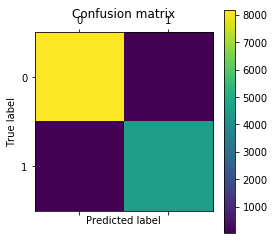

The diagonal elements in confusion matrix represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
------------------------------------------------------------------------------------------------------------------------

 AUC: 0.994

         ROC CURVE   


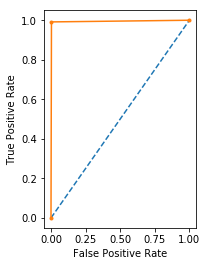

In [78]:
print(metrics.classification_report(y_test,pred2))
print("Accuracy : ",accuracy_score(y_test, pred2))
#plt.subplot(1, 2, 1)
print("------------------------------------------------------------------------------------------------------------------------")
# Compute confusion matrix
cm = confusion_matrix(y_test,pred2)
print("\nconfusion Matrix\n")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
plt.subplot(1, 2, 2)
# calculate AUC
auc = roc_auc_score(y_test,pred2)
print("The diagonal elements in confusion matrix represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.")
print("------------------------------------------------------------------------------------------------------------------------")
print('\n AUC: %.3f' % auc)
# calculate roc curve
print("\n         ROC CURVE   ")
fpr, tpr, thresholds = roc_curve(y_test, pred2)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [79]:
 model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 20)                2300      
_________________________________________________________________
dense_41 (Dense)             (None, 5)                 105       
_________________________________________________________________
dense_42 (Dense)             (None, 2)                 12        
Total params: 2,417
Trainable params: 2,417
Non-trainable params: 0
_________________________________________________________________


**6. Convolutional Neural Networks (CNN)**

In [80]:
print("X_train.shape:",X_train.shape)
print("xtest.shape:",X_test.shape)
print("y_train.shape:",y_train.shape)
print("ytest.shape:",y_test.shape)

X_train.shape: (26061, 114)
xtest.shape: (12837, 114)
y_train.shape: (26061, 1)
ytest.shape: (12837, 1)


Reshaping the values for sending to CNN

In [81]:
#chaning values to numpy array
xtr =  X_train.values
xts  =  X_test.values

In [82]:
xr = xtr.reshape((X_train.shape[0], 1, X_train.shape[1], 1))
xt = xts.reshape((X_test.shape[0],1,X_test.shape[1],1))

In [83]:
xr.shape

(26061, 1, 114, 1)

In [84]:
xt.shape

(12837, 1, 114, 1)

In [85]:
ytrn = keras.utils.to_categorical(y_train)
ytst= keras.utils.to_categorical(y_test)

In [86]:
ytrn.shape

(26061, 2)

In [87]:
ytst.shape

(12837, 2)

In [88]:
from keras.optimizers import Adam
num_classes = 2
# Define ModelCheckpoint outside the loop
checkpoint3 = ModelCheckpoint(filepath="best_weights5.hdf5", verbose=0, save_best_only=True,mode='max') # save best model
for i in range(1):
########################################################################################################################
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(1, 1), padding='same',input_shape=(1, X_train.shape[1], 1),kernel_regularizer=regularizers.l2(0.01)))

    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(1, 1)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (1, 1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(1, 1)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation="softmax"))

    monitor3 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=2, mode='auto')  
    

# show not only log loss but also accuracy for each epoch using metrics=['accuracy']

    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(lr=0.001, decay=1e-6), metrics=['accuracy'])
# The test set is checked during training to monitor progress for early stopping but is never used for gradient descent (model training)
#checkpoint3 = ModelCheckpoint(filepath="best_weights5.hdf5", verbose=0, save_best_only=True,mode='max') # save best model
    callbacks_list = [monitor3,checkpoint3]

    model.fit(xr, ytrn, validation_data=(xt,ytst), callbacks=callbacks_list, verbose=2,batch_size=32, epochs=20)

Train on 26061 samples, validate on 12837 samples
Epoch 1/20
 - 79s - loss: 0.0519 - acc: 0.9887 - val_loss: 0.0285 - val_acc: 0.9936
Epoch 2/20
 - 78s - loss: 0.0312 - acc: 0.9937 - val_loss: 0.0223 - val_acc: 0.9948
Epoch 3/20
 - 78s - loss: 0.0258 - acc: 0.9950 - val_loss: 0.0186 - val_acc: 0.9965
Epoch 4/20
 - 79s - loss: 0.0230 - acc: 0.9950 - val_loss: 0.0194 - val_acc: 0.9961
Epoch 5/20
 - 78s - loss: 0.0220 - acc: 0.9959 - val_loss: 0.0181 - val_acc: 0.9963
Epoch 6/20
 - 78s - loss: 0.0192 - acc: 0.9964 - val_loss: 0.0143 - val_acc: 0.9976
Epoch 7/20
 - 80s - loss: 0.0183 - acc: 0.9959 - val_loss: 0.0128 - val_acc: 0.9963
Epoch 8/20
 - 76s - loss: 0.0156 - acc: 0.9964 - val_loss: 0.0114 - val_acc: 0.9968
Epoch 9/20
 - 76s - loss: 0.0125 - acc: 0.9967 - val_loss: 0.0121 - val_acc: 0.9965
Epoch 10/20
 - 71s - loss: 0.0141 - acc: 0.9970 - val_loss: 0.0093 - val_acc: 0.9975
Epoch 11/20
 - 74s - loss: 0.0128 - acc: 0.9967 - val_loss: 0.0098 - val_acc: 0.9971
Epoch 12/20
 - 82s - los

In [89]:
yt = y_test.values   # we need to reshape true value to the same shape of predicted value for scoring calculation to be done

In [90]:
import sklearn.metrics as metrics
y_pred_ohe = model.predict(xt)  # shape=(n_samples, 12)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)  # only necessary if output has one-hot-encoding, shape=(n_samples)

confusion_matrix = metrics.confusion_matrix(y_true=yt, y_pred=y_pred_labels)  # shape=(12, 12)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      8194
          1       1.00      1.00      1.00      4643

avg / total       1.00      1.00      1.00     12837

Accuracy :  0.9976630053750877
------------------------------------------------------------------------------------------------------------------------

confusion Matrix

[[8186    8]
 [  22 4621]]


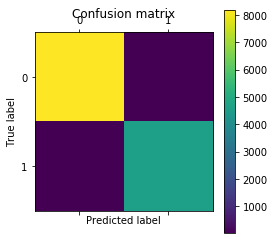

The diagonal elements in confusion matrix represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
------------------------------------------------------------------------------------------------------------------------

 AUC: 0.994

         ROC CURVE   


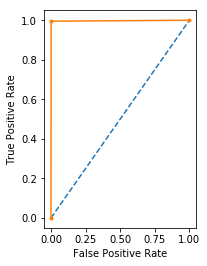

In [91]:
print(metrics.classification_report(yt,y_pred_labels))
print("Accuracy : ",accuracy_score(yt, y_pred_labels))
#plt.subplot(1, 2, 1)
print("------------------------------------------------------------------------------------------------------------------------")
# Compute confusion matrix
cm = confusion_matrix
print("\nconfusion Matrix\n")
print(cm)
# Show confusion matrix in a separate window
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
plt.subplot(1, 2, 2)
# calculate AUC
print("The diagonal elements in confusion matrix represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.")
print("------------------------------------------------------------------------------------------------------------------------")
print('\n AUC: %.3f' % auc)
# calculate roc curve
print("\n         ROC CURVE   ")
fpr, tpr, thresholds = roc_curve(yt,y_pred_labels)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Modeling as a Multi Class -classification problem.
# Model classifying each type .

Can model detect intrusion detection and treat problem as a multi-class classification problem so that we can detect the type of each intrusion?   How good the predictive model can be in this case? 

**Label Encoding the Target Variable**

In [92]:
#label of the dataset 
dfl.head()

,outcome
1,normal.
2,normal.
4,normal.
5,normal.
6,normal.


In [93]:
dfl['outcome'].unique()

array(['normal.', 'neptune.', 'back.', 'teardrop.', 'satan.',
       'warezclient.', 'ipsweep.', 'smurf.', 'nmap.', 'pod.',
       'portsweep.', 'imap.', 'buffer_overflow.', 'loadmodule.', 'land.',
       'rootkit.', 'ftp_write.', 'warezmaster.', 'phf.', 'multihop.'],
      dtype=object)

In [94]:
dftl = dfl.copy()

In [95]:
dftl.head()

,outcome
1,normal.
2,normal.
4,normal.
5,normal.
6,normal.


In [96]:
# Label Encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dftl['outcome'] = le.fit_transform(dftl['outcome'])

In [97]:
dftl['outcome'].unique()

array([10,  8,  0, 17, 15, 18,  4, 16,  9, 12, 13,  3,  1,  6,  5, 14,  2,
       19, 11,  7], dtype=int64)

In [98]:
dftl['outcome'].head()

1    10
2    10
4    10
5    10
6    10
Name: outcome, dtype: int64

**Splitting the dataset into Training and Testing set**

In [99]:
X_train, X_test, y_train, y_test = train_test_split(dff, dftl, test_size=0.33, random_state=42, shuffle = True )

*MODELS**

**1. Logistic Regression**

In [100]:
#Logistic Regression 
from sklearn import linear_model 
logmod = linear_model.LogisticRegression(C=1e5)
logmod.fit(X_train, y_train.values.ravel())
y_predval = logmod.predict(X_test)

In [101]:
print("Performance Metrics of Logistric Regression")
print(metrics.classification_report(y_test,y_predval))
print("Accuracy : ",accuracy_score(y_test, y_predval))
print("------------------------------------------------------------------------------------------------------------------------")


Performance Metrics of Logistric Regression
             precision    recall  f1-score   support

          0       0.99      0.96      0.97        80
          1       0.50      0.33      0.40         3
          2       0.50      1.00      0.67         1
          3       1.00      0.50      0.67         2
          4       1.00      0.94      0.97        50
          5       1.00      1.00      1.00         1
          6       0.00      0.00      0.00         1
          7       0.00      0.00      0.00         0
          8       1.00      1.00      1.00      4190
          9       0.94      0.80      0.86        20
         10       1.00      1.00      1.00      8189
         11       0.00      0.00      0.00         1
         12       1.00      1.00      1.00        24
         13       0.50      0.67      0.57         3
         15       0.97      0.89      0.93        36
         16       0.95      1.00      0.98        60
         17       1.00      1.00      1.00        82
 

C:\Users\Gurudev\Anaconda3\envs\Tensorflowexclusive\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gurudev\Anaconda3\envs\Tensorflowexclusive\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [102]:
#y_predval = pd.DataFrame(y_predval.reshape(-1, len(y_predval)),columns=columns)
#y_predval = pd.DataFrame(np.atleast_2d(y_predval))
#y_predval = y_predval.T
#y_predval.columns = ['outcome']

**2. Nearest Neighbor**

In [103]:
#KNN to show true ratings of 5 businesses and the predicted ratings from model
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train.values.ravel())
y_predval= neigh.predict(X_test)
print("Performance Metrics of Logistric Regression")
print(metrics.classification_report(y_test,y_predval))
print("Accuracy : ",accuracy_score(y_test, y_predval))
#plt.subplot(1, 2, 1)
print("------------------------------------------------------------------------------------------------------------------------")


Performance Metrics of Logistric Regression
             precision    recall  f1-score   support

          0       0.99      0.95      0.97        80
          1       0.50      0.33      0.40         3
          2       0.00      0.00      0.00         1
          3       0.00      0.00      0.00         2
          4       0.94      0.94      0.94        50
          5       1.00      1.00      1.00         1
          6       0.00      0.00      0.00         1
          8       1.00      1.00      1.00      4190
          9       0.95      0.90      0.92        20
         10       1.00      1.00      1.00      8189
         11       0.00      0.00      0.00         1
         12       0.92      1.00      0.96        24
         13       0.00      0.00      0.00         3
         15       1.00      0.81      0.89        36
         16       0.95      1.00      0.98        60
         17       1.00      0.98      0.99        82
         18       0.95      0.94      0.94        93
 

C:\Users\Gurudev\Anaconda3\envs\Tensorflowexclusive\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**3. Support Vector Machine**

In [104]:
#SVM to show true ratings of 5 businesses and the predicted ratings from model
from sklearn import svm
#logmodel=  svm.SVC(kernel='linear')
logmodel=  svm.SVC(C=1, kernel = 'linear', gamma=1, verbose= False, probability=False, random_state=42)
logmodel.fit(X_train, y_train.values.ravel())
y_predval = logmodel.predict(X_test)
#SVM to show true ratings of 5 businesses and the predicted ratings from model
from sklearn import svm
#logmodel=  svm.SVC(kernel='linear')
logmodel=  svm.SVC(C=1, kernel = 'linear', gamma=1, verbose= False, probability=False, random_state=42)
logmodel.fit(X_train, y_train.values.ravel())
y_predval = logmodel.predict(X_test)
print("Performance Metrics of Logistric Regression")
print(metrics.classification_report(y_test,y_predval))
print("Accuracy : ",accuracy_score(y_test, y_predval))
#plt.subplot(1, 2, 1)
print("------------------------------------------------------------------------------------------------------------------------")


Performance Metrics of Logistric Regression
             precision    recall  f1-score   support

          0       0.96      0.99      0.98        80
          1       0.00      0.00      0.00         3
          2       0.50      1.00      0.67         1
          3       1.00      0.50      0.67         2
          4       1.00      0.94      0.97        50
          5       1.00      1.00      1.00         1
          6       0.00      0.00      0.00         1
          7       0.00      0.00      0.00         0
          8       1.00      1.00      1.00      4190
          9       0.95      1.00      0.98        20
         10       1.00      1.00      1.00      8189
         11       0.00      0.00      0.00         1
         12       1.00      1.00      1.00        24
         13       1.00      0.33      0.50         3
         15       0.97      0.86      0.91        36
         16       0.97      1.00      0.98        60
         17       1.00      1.00      1.00        82
 

C:\Users\Gurudev\Anaconda3\envs\Tensorflowexclusive\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gurudev\Anaconda3\envs\Tensorflowexclusive\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


**4 . Gaussian Naive Bayes**

In [105]:
#Multinomial Naive Bayes to show true ratings of 5 businesses and the predicted ratings from model
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train.values.ravel())
y_predval = nb.predict(X_test)
print("Performance Metrics of Logistric Regression")
print(metrics.classification_report(y_test,y_predval))
print("Accuracy : ",accuracy_score(y_test, y_predval))
#plt.subplot(1, 2, 1)
print("------------------------------------------------------------------------------------------------------------------------")


Performance Metrics of Logistric Regression
             precision    recall  f1-score   support

          0       0.05      0.97      0.10        80
          1       0.15      0.67      0.25         3
          2       0.08      1.00      0.15         1
          3       1.00      0.50      0.67         2
          4       0.74      0.96      0.83        50
          5       1.00      1.00      1.00         1
          6       0.00      0.00      0.00         1
          8       1.00      0.10      0.18      4190
          9       0.30      0.30      0.30        20
         10       1.00      0.75      0.86      8189
         11       0.00      0.00      0.00         1
         12       0.96      1.00      0.98        24
         13       0.00      0.67      0.00         3
         14       0.00      0.00      0.00         0
         15       0.01      0.86      0.02        36
         16       0.78      1.00      0.88        60
         17       0.98      1.00      0.99        82
 

C:\Users\Gurudev\Anaconda3\envs\Tensorflowexclusive\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Gurudev\Anaconda3\envs\Tensorflowexclusive\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


**5. Fully-Connected Neural Networks**

encoding the target variable 

In [106]:
y_binary = to_categorical(dftl)

In [107]:
X_train, X_test, y_train, y_test = train_test_split(dff, y_binary , test_size=0.33, random_state=42, shuffle = True )

Model Version 1

In [108]:
import keras as kp
# Define ModelCheckpoint outside the loop
checkpoint3 = ModelCheckpoint(filepath="best_weights5.hdf5", verbose=0, save_best_only=True,mode='max') # save best model
for i in range(3):
########################################################################################################################
    model3 = Sequential()
    model3.add(Dense(20, input_dim = X_train.shape[1], activation='relu'))
    model3.add(Dense(15,activation='relu' ))
    model3.add(Dense(100))
    model3.add(LeakyReLU(alpha=0.1))
    model3.add(Dense(100))
    model3.add(LeakyReLU(alpha=0.1)) ##Leaky Relu
    model3.add(Dense(20,activation= 'relu' ))
    # Regularisation Through Drop Out 
    model3.add(Dense(15,activation='tanh'))
    model3.add(Dense(15, 
                kernel_regularizer=regularizers.l1(0.01),
                activity_regularizer=regularizers.l2(0.01), activation='relu'))
    model3.add(Dropout(0.25))
    model3.add(Dense(15,activation= 'relu'))
    model3.add(Dense(y_test.shape[1],activation='sigmoid'))
    rms = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    model3.compile(loss='categorical_crossentropy', optimizer= rms ,metrics=[kp.metrics.mae, kp.metrics.categorical_accuracy])
    monitor3 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=2, mode='auto')  
# The test set is checked during training to monitor progress for early stopping but is never used for gradient descent (model training)
#checkpoint3 = ModelCheckpoint(filepath="best_weights5.hdf5", verbose=0, save_best_only=True,mode='max') # save best model
    callbacks_list = [monitor3,checkpoint3]
    model3.fit(X_train, y_train, validation_data=(X_test,y_test), callbacks=callbacks_list, verbose=2,batch_size=32, epochs=200)
##########################################################################################################################

#y_true = np.argmax(y_test,axis=1)
#score = sk.metrics.accuracy_score(y_test, pred3)
#print("Final accuracy: {}".format(score))

Train on 26061 samples, validate on 12837 samples
Epoch 1/200
 - 2s - loss: 1.2517 - mean_absolute_error: 0.1083 - categorical_accuracy: 0.6469 - val_loss: 0.4385 - val_mean_absolute_error: 0.0237 - val_categorical_accuracy: 0.9642
Epoch 2/200
 - 2s - loss: 0.2193 - mean_absolute_error: 0.0300 - categorical_accuracy: 0.9629 - val_loss: 0.1292 - val_mean_absolute_error: 0.0308 - val_categorical_accuracy: 0.9699
Epoch 3/200
 - 2s - loss: 0.1374 - mean_absolute_error: 0.0318 - categorical_accuracy: 0.9660 - val_loss: 0.1150 - val_mean_absolute_error: 0.0303 - val_categorical_accuracy: 0.9702
Epoch 4/200
 - 2s - loss: 0.1253 - mean_absolute_error: 0.0302 - categorical_accuracy: 0.9674 - val_loss: 0.1164 - val_mean_absolute_error: 0.0259 - val_categorical_accuracy: 0.9696
Epoch 5/200
 - 2s - loss: 0.1206 - mean_absolute_error: 0.0291 - categorical_accuracy: 0.9678 - val_loss: 0.1073 - val_mean_absolute_error: 0.0277 - val_categorical_accuracy: 0.9710
Epoch 6/200
 - 2s - loss: 0.1188 - mean_

Epoch 46/200
 - 3s - loss: 0.1007 - mean_absolute_error: 0.0354 - categorical_accuracy: 0.9803 - val_loss: 0.0702 - val_mean_absolute_error: 0.0338 - val_categorical_accuracy: 0.9856
Epoch 47/200
 - 2s - loss: 0.1030 - mean_absolute_error: 0.0356 - categorical_accuracy: 0.9797 - val_loss: 0.0824 - val_mean_absolute_error: 0.0335 - val_categorical_accuracy: 0.9838
Epoch 48/200
 - 2s - loss: 0.1116 - mean_absolute_error: 0.0360 - categorical_accuracy: 0.9788 - val_loss: 0.0828 - val_mean_absolute_error: 0.0334 - val_categorical_accuracy: 0.9836
Epoch 49/200
 - 2s - loss: 0.1066 - mean_absolute_error: 0.0356 - categorical_accuracy: 0.9783 - val_loss: 0.0687 - val_mean_absolute_error: 0.0335 - val_categorical_accuracy: 0.9859
Epoch 50/200
 - 2s - loss: 0.1023 - mean_absolute_error: 0.0360 - categorical_accuracy: 0.9791 - val_loss: 0.0752 - val_mean_absolute_error: 0.0334 - val_categorical_accuracy: 0.9857
Epoch 51/200
 - 2s - loss: 0.1031 - mean_absolute_error: 0.0361 - categorical_accurac

Epoch 12/200
 - 2s - loss: 0.1035 - mean_absolute_error: 0.0275 - categorical_accuracy: 0.9728 - val_loss: 0.1002 - val_mean_absolute_error: 0.0282 - val_categorical_accuracy: 0.9751
Epoch 13/200
 - 2s - loss: 0.1048 - mean_absolute_error: 0.0295 - categorical_accuracy: 0.9738 - val_loss: 0.0956 - val_mean_absolute_error: 0.0267 - val_categorical_accuracy: 0.9797
Epoch 14/200
 - 2s - loss: 0.1060 - mean_absolute_error: 0.0305 - categorical_accuracy: 0.9756 - val_loss: 0.0955 - val_mean_absolute_error: 0.0297 - val_categorical_accuracy: 0.9818
Epoch 15/200
 - 2s - loss: 0.1040 - mean_absolute_error: 0.0311 - categorical_accuracy: 0.9750 - val_loss: 0.0985 - val_mean_absolute_error: 0.0331 - val_categorical_accuracy: 0.9817
Epoch 16/200
 - 2s - loss: 0.1034 - mean_absolute_error: 0.0341 - categorical_accuracy: 0.9751 - val_loss: 0.0909 - val_mean_absolute_error: 0.0365 - val_categorical_accuracy: 0.9821
Epoch 17/200
 - 2s - loss: 0.1015 - mean_absolute_error: 0.0363 - categorical_accurac

Epoch 57/200
 - 2s - loss: 0.0985 - mean_absolute_error: 0.0500 - categorical_accuracy: 0.9799 - val_loss: 0.0888 - val_mean_absolute_error: 0.0500 - val_categorical_accuracy: 0.9871
Epoch 58/200
 - 2s - loss: 0.0957 - mean_absolute_error: 0.0500 - categorical_accuracy: 0.9807 - val_loss: 0.0751 - val_mean_absolute_error: 0.0500 - val_categorical_accuracy: 0.9902
Epoch 59/200
 - 2s - loss: 0.1016 - mean_absolute_error: 0.0500 - categorical_accuracy: 0.9809 - val_loss: 0.0764 - val_mean_absolute_error: 0.0500 - val_categorical_accuracy: 0.9900
Epoch 60/200
 - 2s - loss: 0.0997 - mean_absolute_error: 0.0500 - categorical_accuracy: 0.9803 - val_loss: 0.0786 - val_mean_absolute_error: 0.0500 - val_categorical_accuracy: 0.9899
Epoch 61/200
 - 2s - loss: 0.0999 - mean_absolute_error: 0.0500 - categorical_accuracy: 0.9778 - val_loss: 0.0966 - val_mean_absolute_error: 0.0500 - val_categorical_accuracy: 0.9838
Epoch 62/200
 - 2s - loss: 0.1131 - mean_absolute_error: 0.0500 - categorical_accurac

Epoch 102/200
 - 2s - loss: 0.1174 - mean_absolute_error: 0.0500 - categorical_accuracy: 0.9784 - val_loss: 0.0601 - val_mean_absolute_error: 0.0500 - val_categorical_accuracy: 0.9910
Epoch 103/200
 - 2s - loss: 0.1138 - mean_absolute_error: 0.0500 - categorical_accuracy: 0.9789 - val_loss: 0.0614 - val_mean_absolute_error: 0.0500 - val_categorical_accuracy: 0.9911
Epoch 104/200
 - 2s - loss: 0.1172 - mean_absolute_error: 0.0500 - categorical_accuracy: 0.9784 - val_loss: 0.0664 - val_mean_absolute_error: 0.0500 - val_categorical_accuracy: 0.9908
Epoch 105/200
 - 2s - loss: 0.1137 - mean_absolute_error: 0.0500 - categorical_accuracy: 0.9792 - val_loss: 0.0685 - val_mean_absolute_error: 0.0500 - val_categorical_accuracy: 0.9897
Epoch 106/200
 - 2s - loss: 0.1179 - mean_absolute_error: 0.0500 - categorical_accuracy: 0.9781 - val_loss: 0.0614 - val_mean_absolute_error: 0.0500 - val_categorical_accuracy: 0.9907
Epoch 107/200
 - 2s - loss: 0.1139 - mean_absolute_error: 0.0500 - categorical_a

Epoch 25/200
 - 2s - loss: 0.0917 - mean_absolute_error: 0.0467 - categorical_accuracy: 0.9777 - val_loss: 0.0789 - val_mean_absolute_error: 0.0472 - val_categorical_accuracy: 0.9823
Epoch 26/200
 - 2s - loss: 0.0967 - mean_absolute_error: 0.0468 - categorical_accuracy: 0.9772 - val_loss: 0.0820 - val_mean_absolute_error: 0.0479 - val_categorical_accuracy: 0.9825
Epoch 27/200
 - 2s - loss: 0.0928 - mean_absolute_error: 0.0468 - categorical_accuracy: 0.9762 - val_loss: 0.0825 - val_mean_absolute_error: 0.0468 - val_categorical_accuracy: 0.9828
Epoch 28/200
 - 2s - loss: 0.0969 - mean_absolute_error: 0.0468 - categorical_accuracy: 0.9761 - val_loss: 0.0880 - val_mean_absolute_error: 0.0466 - val_categorical_accuracy: 0.9783
Epoch 29/200
 - 2s - loss: 0.0964 - mean_absolute_error: 0.0469 - categorical_accuracy: 0.9755 - val_loss: 0.0865 - val_mean_absolute_error: 0.0467 - val_categorical_accuracy: 0.9818
Epoch 30/200
 - 2s - loss: 0.0940 - mean_absolute_error: 0.0472 - categorical_accurac

Model Version 2

In [109]:
checkpoint = ModelCheckpoint(filepath="best_weights3.hdf5", verbose=0, save_best_only=True,mode='max') # save best model
for i in range(4):
########################################################################################################################
    model1 = Sequential()
    model1.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
    model1.add(Dense(5,activation='relu'))
    model1.add(Dense(y_test.shape[1],activation='softmax'))
    model1.compile(loss='categorical_crossentropy', optimizer= keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),metrics=[ kp.metrics.categorical_accuracy])
    monitor2 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=2, mode='auto')  
    # patience: number of epochs with no improvement after which training will be stopped
    # The test set is checked during training to monitor progress for early stopping but is never used for gradient descent (model training)
    callbacks_list = [monitor2,checkpoint]
    model1.fit(X_train, y_train, validation_data=(X_test,y_test), callbacks=callbacks_list, verbose=2,batch_size=32, epochs=100)
##########################################################################################################################





Train on 26061 samples, validate on 12837 samples
Epoch 1/100
 - 2s - loss: 0.4326 - categorical_accuracy: 0.9314 - val_loss: 0.0737 - val_categorical_accuracy: 0.9830
Epoch 2/100
 - 2s - loss: 0.0557 - categorical_accuracy: 0.9855 - val_loss: 0.0519 - val_categorical_accuracy: 0.9898
Epoch 3/100
 - 1s - loss: 0.0401 - categorical_accuracy: 0.9904 - val_loss: 0.0396 - val_categorical_accuracy: 0.9913
Epoch 4/100
 - 1s - loss: 0.0314 - categorical_accuracy: 0.9922 - val_loss: 0.0315 - val_categorical_accuracy: 0.9937
Epoch 5/100
 - 1s - loss: 0.0264 - categorical_accuracy: 0.9938 - val_loss: 0.0267 - val_categorical_accuracy: 0.9946
Epoch 6/100
 - 1s - loss: 0.0225 - categorical_accuracy: 0.9944 - val_loss: 0.0256 - val_categorical_accuracy: 0.9943
Epoch 7/100
 - 1s - loss: 0.0207 - categorical_accuracy: 0.9950 - val_loss: 0.0228 - val_categorical_accuracy: 0.9949
Epoch 8/100
 - 1s - loss: 0.0189 - categorical_accuracy: 0.9955 - val_loss: 0.0214 - val_categorical_accuracy: 0.9960
Epoch 

Epoch 28/100
 - 1s - loss: 0.0092 - categorical_accuracy: 0.9977 - val_loss: 0.0166 - val_categorical_accuracy: 0.9973
Epoch 29/100
 - 2s - loss: 0.0092 - categorical_accuracy: 0.9979 - val_loss: 0.0159 - val_categorical_accuracy: 0.9977
Epoch 30/100
 - 1s - loss: 0.0090 - categorical_accuracy: 0.9977 - val_loss: 0.0167 - val_categorical_accuracy: 0.9973
Epoch 31/100
 - 1s - loss: 0.0090 - categorical_accuracy: 0.9977 - val_loss: 0.0180 - val_categorical_accuracy: 0.9970
Epoch 32/100
 - 1s - loss: 0.0089 - categorical_accuracy: 0.9979 - val_loss: 0.0160 - val_categorical_accuracy: 0.9973
Epoch 33/100
 - 1s - loss: 0.0087 - categorical_accuracy: 0.9977 - val_loss: 0.0162 - val_categorical_accuracy: 0.9975
Epoch 34/100
 - 1s - loss: 0.0084 - categorical_accuracy: 0.9978 - val_loss: 0.0173 - val_categorical_accuracy: 0.9971
Epoch 35/100
 - 1s - loss: 0.0087 - categorical_accuracy: 0.9978 - val_loss: 0.0160 - val_categorical_accuracy: 0.9976
Epoch 36/100
 - 1s - loss: 0.0083 - categorical_

Epoch 20/100
 - 1s - loss: 0.0101 - categorical_accuracy: 0.9976 - val_loss: 0.0178 - val_categorical_accuracy: 0.9970
Epoch 21/100
 - 1s - loss: 0.0098 - categorical_accuracy: 0.9973 - val_loss: 0.0166 - val_categorical_accuracy: 0.9970
Epoch 22/100
 - 2s - loss: 0.0094 - categorical_accuracy: 0.9979 - val_loss: 0.0167 - val_categorical_accuracy: 0.9971
Epoch 23/100
 - 1s - loss: 0.0091 - categorical_accuracy: 0.9978 - val_loss: 0.0185 - val_categorical_accuracy: 0.9967
Epoch 24/100
 - 1s - loss: 0.0094 - categorical_accuracy: 0.9978 - val_loss: 0.0182 - val_categorical_accuracy: 0.9970
Epoch 25/100
 - 1s - loss: 0.0091 - categorical_accuracy: 0.9980 - val_loss: 0.0171 - val_categorical_accuracy: 0.9970
Epoch 26/100
 - 1s - loss: 0.0086 - categorical_accuracy: 0.9982 - val_loss: 0.0174 - val_categorical_accuracy: 0.9967
Epoch 27/100
 - 1s - loss: 0.0084 - categorical_accuracy: 0.9983 - val_loss: 0.0168 - val_categorical_accuracy: 0.9972
Epoch 28/100
 - 1s - loss: 0.0083 - categorical_

In [110]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 1, 114, 32)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 1, 114, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 114, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 114, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 114, 64)        2112      
_________________________________________________________________
activation_2 (Activation)    (None, 1, 114, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 114, 64)        0         
__________

**6. Convolutional Neural Networks (CNN)**

In [111]:
xr = xtr.reshape((X_train.shape[0], 1, X_train.shape[1], 1))
xt = xts.reshape((X_test.shape[0],1,X_test.shape[1],1))

In [112]:
from keras.optimizers import Adam
num_classes = 2
# Define ModelCheckpoint outside the loop
checkpoint3 = ModelCheckpoint(filepath="best_weights5.hdf5", verbose=0, save_best_only=True,mode='max') # save best model
for i in range(1):
########################################################################################################################
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(1, 1), padding='same',input_shape=(1, X_train.shape[1], 1)))

    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(1, 1)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (1, 1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(1, 1)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))

    model.add(Dense(y_test.shape[1], activation="softmax"))

    monitor3 = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, verbose=2, mode='auto')  
    

# show not only log loss but also accuracy for each epoch using metrics=['accuracy']

    model.compile(loss=keras.losses.categorical_crossentropy, optimizer=Adam(lr=0.001, decay=1e-6), metrics=['accuracy'])
# The test set is checked during training to monitor progress for early stopping but is never used for gradient descent (model training)
#checkpoint3 = ModelCheckpoint(filepath="best_weights5.hdf5", verbose=0, save_best_only=True,mode='max') # save best model
    callbacks_list = [monitor3,checkpoint3]

    model.fit(xr, y_train, validation_data=(xt,y_test), callbacks=callbacks_list, verbose=2,batch_size=32, epochs=100)

Train on 26061 samples, validate on 12837 samples
Epoch 1/100
 - 71s - loss: 0.8844 - acc: 0.6299 - val_loss: 0.8795 - val_acc: 0.6379
Epoch 2/100
 - 70s - loss: 0.8634 - acc: 0.6382 - val_loss: 0.8793 - val_acc: 0.6377
Epoch 3/100
 - 70s - loss: 0.8617 - acc: 0.6379 - val_loss: 0.8823 - val_acc: 0.6379
Epoch 4/100
 - 70s - loss: 0.8591 - acc: 0.6384 - val_loss: 0.8590 - val_acc: 0.6379
Epoch 5/100
 - 71s - loss: 0.8565 - acc: 0.6387 - val_loss: 0.8506 - val_acc: 0.6379
Epoch 6/100
 - 72s - loss: 0.8558 - acc: 0.6384 - val_loss: 0.8519 - val_acc: 0.6379
Epoch 7/100
 - 70s - loss: 0.8547 - acc: 0.6385 - val_loss: 0.8489 - val_acc: 0.6379
Epoch 8/100
 - 70s - loss: 0.8539 - acc: 0.6384 - val_loss: 0.8480 - val_acc: 0.6379
Epoch 9/100
 - 70s - loss: 0.8529 - acc: 0.6386 - val_loss: 0.8488 - val_acc: 0.6379
Epoch 10/100
 - 70s - loss: 0.8531 - acc: 0.6385 - val_loss: 0.8481 - val_acc: 0.6379
Epoch 11/100
 - 70s - loss: 0.8529 - acc: 0.6385 - val_loss: 0.8502 - val_acc: 0.6378
Epoch 12/100


**========================================================================================================================**